In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [ ]:
import psutil
psutil.virtual_memory()

svmem(total=13613314048, available=12734144512, percent=6.5, used=578662400, free=9767362560, active=863997952, inactive=2764410880, buffers=62844928, cached=3204444160, shared=1249280, slab=141111296)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def loaddata(filename):
    df = pd.read_csv(f'{filename}.csv',sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
    return df
rating=loaddata('/content/drive/MyDrive/BX-Book-Ratings (1)')
books=loaddata('/content/drive/MyDrive/BX-Books')
users=loaddata('/content/drive/MyDrive/BX-Users')

<ipython-input-4-5cf6ef78d9c0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f'{filename}.csv',sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
<ipython-input-4-5cf6ef78d9c0>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f'{filename}.csv',sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
<ipython-input-4-5cf6ef78d9c0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f'{filename}.csv',sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
<ipython-input-4-5cf6ef78d9c0>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in 

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
rating.shape

(1149780, 3)

In [ ]:
books.shape

(271360, 8)

In [ ]:
users.shape

(278858, 3)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [ ]:
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [ ]:
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [ ]:
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [ ]:
books.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books.loc[129037, 'Publisher'] = 'Bantam'

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [ ]:
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life"

In [ ]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [ ]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"


In [ ]:
books.loc[books['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [ ]:
books['Year-Of-Publication'] =books['Year-Of-Publication'].astype(int)

In [ ]:
books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] < 1800)]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [ ]:
books.loc[books.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books.loc[books.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [ ]:
books.loc[(books['Year-Of-Publication'] > 2023) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(int(books['Year-Of-Publication'].median()), inplace=True)

In [ ]:
books['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

In [ ]:
books['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [ ]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
books['ISBN']=books['ISBN'].str.upper()
books['Book-Author']=books['Book-Author'].str.upper()


In [ ]:
books[books['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.0,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


In [ ]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [ ]:
books.drop_duplicates(keep="first",inplace=True)
books.reset_index(drop=True,inplace=True)

In [ ]:
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271047 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.3+ MB


In [ ]:
pd.concat([users.head(10),users.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users[users['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [ ]:
print(users.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

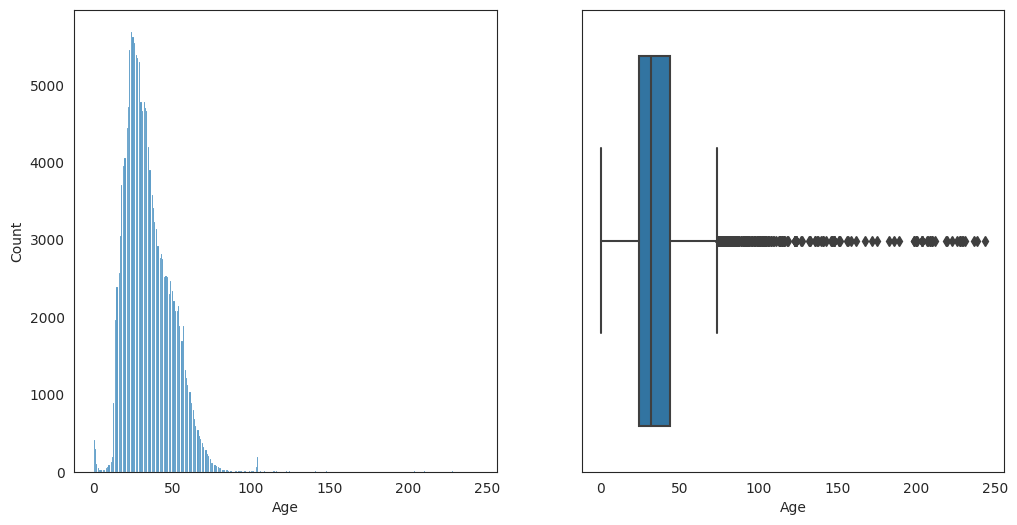

In [ ]:
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

In [ ]:
users.loc[(users['Age']>95)|(users['Age']<4),'Age']=np.nan

In [ ]:
print('The number of missing values is ',users['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [ ]:
normal_age_series = pd.Series(np.random.normal(loc=users.Age.mean(), scale=users.Age.std(), size=users[users.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users = users.sort_values('Age',na_position='first').reset_index(drop=True)
users.Age.fillna(round(abs_age_series), inplace = True)


In [ ]:
users.Age.describe()

count    278858.000000
mean         34.749636
std          13.583081
min           0.000000
25%          25.000000
50%          33.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [ ]:
users['Age'].isnull().sum()

0

In [ ]:
def age_group(age):
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [ ]:
users['Age_group']=users['Age'].apply(lambda x: age_group(x))

In [ ]:
users['Location'].nunique()

57339

In [ ]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [ ]:
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'],
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)


In [ ]:
users['Country']=users['Country'].str.upper()

In [ ]:
users.drop('Location',axis=1,inplace=True)

In [ ]:
users.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [ ]:
users.Country.value_counts()

USA               139746
CANADA             21658
UK                 18565
GERMANY            17074
SPAIN              13258
                   ...  
ROSARIO                1
BURKINAFASU            1
ADSGFDR                1
HENRY                  1
SAN BERNARDINO         1
Name: Country, Length: 473, dtype: int64

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating['User-ID'].nunique(), rating['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556


In [ ]:
rating['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [ ]:
rating[rating.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [ ]:
rating_df_new = rating[rating['ISBN'].isin(books['ISBN'])]

In [ ]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [ ]:
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


In [ ]:
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


In [ ]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [ ]:
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].value_counts()

0971880107    1
0316666343    1
0385504209    1
0060928336    1
0312195516    1
044023722X    1
0142001740    1
067976402X    1
0671027360    1
0446672211    1
Name: ISBN, dtype: int64

In [ ]:
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.0,Pocket Star
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.0,Warner Books
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA


In [ ]:
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [ ]:
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial


In [ ]:
df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')

In [ ]:
import pickle
with open('/content/drive/My Drive/data.pickle', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
df.shape

(383693, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 383692
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383693 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   User-ID              383693 non-null  int64  
 6   Book-Rating          383693 non-null  int64  
 7   Age                  383693 non-null  float64
 8   Age_group            383693 non-null  object 
 9   Country              383693 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


In [ ]:
df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,76.0,Elderly,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,76.0,Elderly,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,8,5,76.0,Elderly,CANADA
3,1552041778,Jane Doe,R. J. KAISER,1999.0,Mira Books,8,5,76.0,Elderly,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.0,Brilliance Audio - Trade,8,6,76.0,Elderly,CANADA
5,1575663937,More Cunning Than Man: A Social History of Rats and Man,ROBERT HENDRICKSON,1999.0,Kensington Publishing Corp.,8,6,76.0,Elderly,CANADA
6,1881320189,Goodbye to the Buttermilk Sky,JULIA OLIVER,1994.0,River City Pub,8,7,76.0,Elderly,CANADA
7,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,11676,8,33.0,Youth,OTHERS
8,0399135782,The Kitchen God's Wife,AMY TAN,1991.0,Putnam Pub Group,11676,9,33.0,Youth,OTHERS
9,0671870432,PLEADING GUILTY,SCOTT TUROW,1993.0,Audioworks,11676,8,33.0,Youth,OTHERS


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

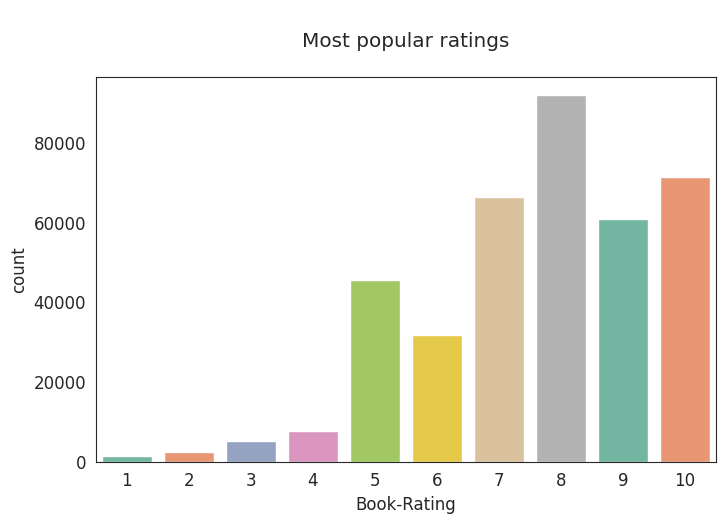

In [ ]:
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')

<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

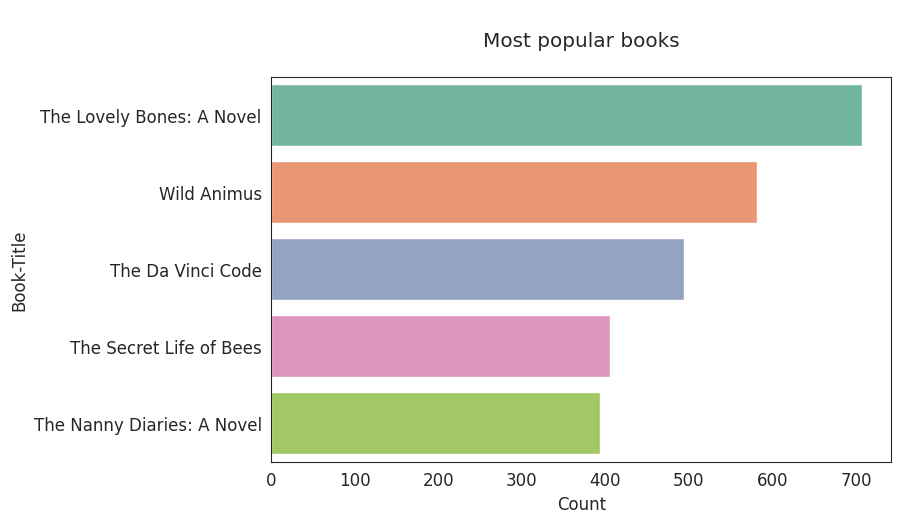

In [ ]:
popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

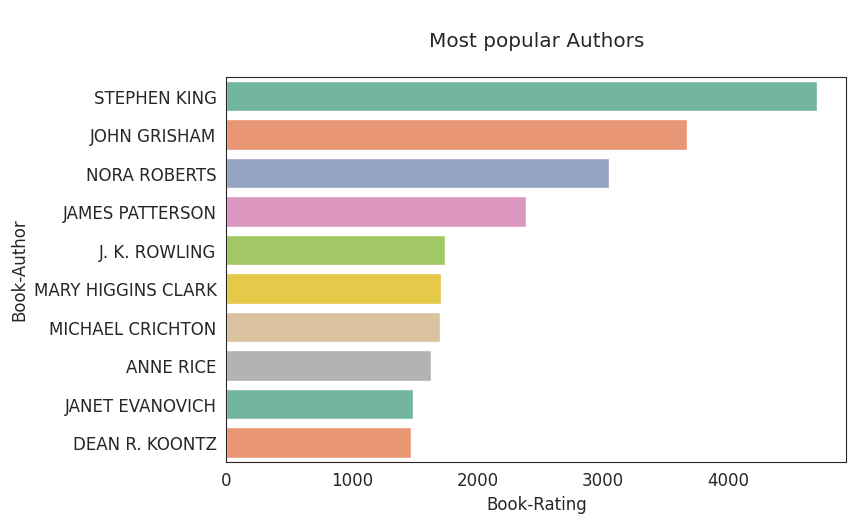

In [ ]:
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

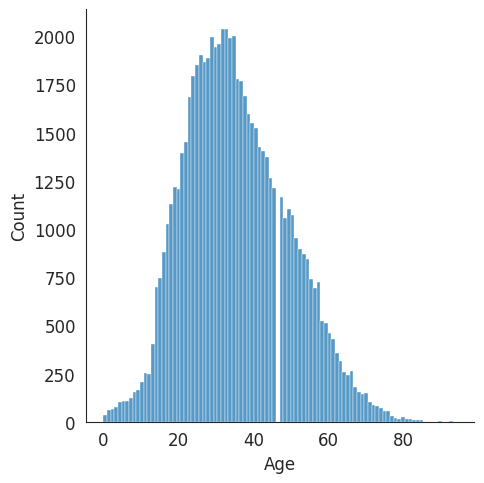

In [ ]:
age_df=users[users['User-ID'].isin(list(df['User-ID'].unique()))]
sns.displot(age_df.Age)

Text(0.5, 0, 'No of users')

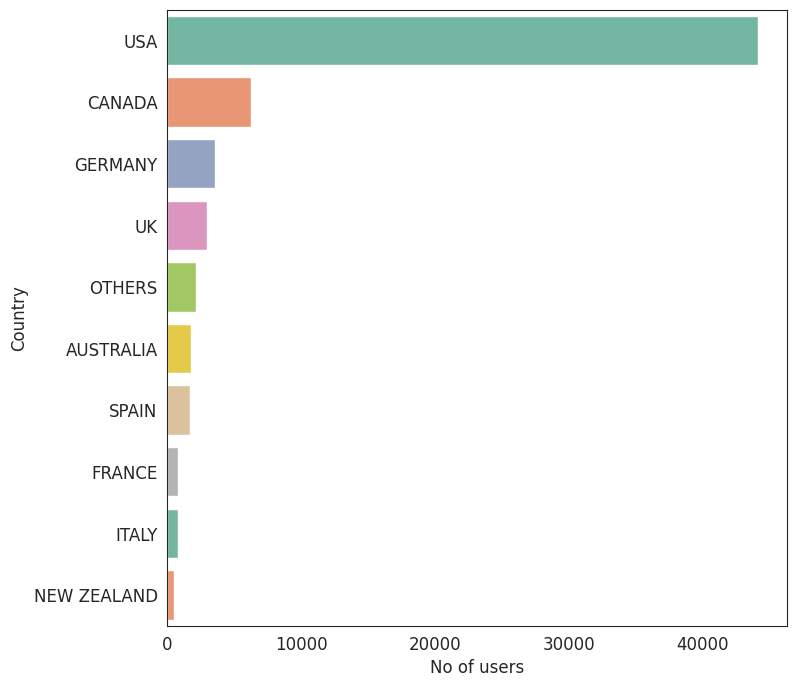

In [ ]:
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

In [ ]:
df['User-ID'].value_counts()

11676     6940
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: User-ID, Length: 68080, dtype: int64

In [ ]:
df.groupby('User-ID')['Book-Rating'].count().describe()

count    68080.000000
mean         5.635914
std         41.736965
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6940.000000
Name: Book-Rating, dtype: float64

<Axes: xlabel='Book-Title', ylabel='Publisher'>

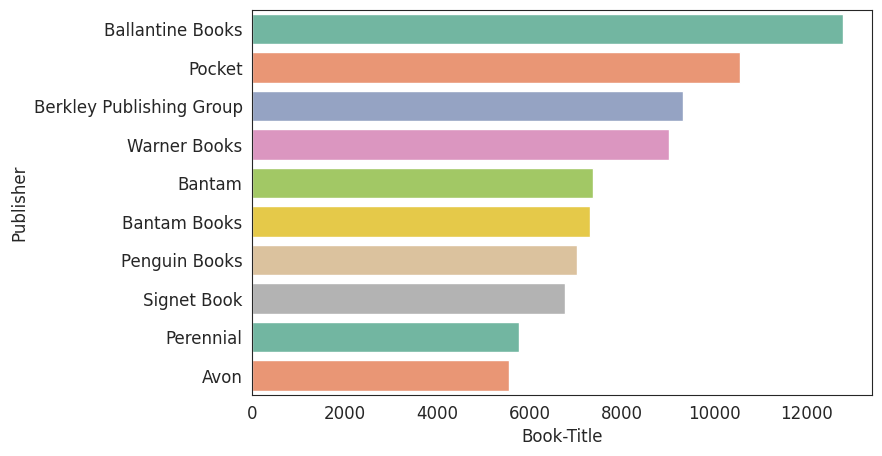

In [ ]:
publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

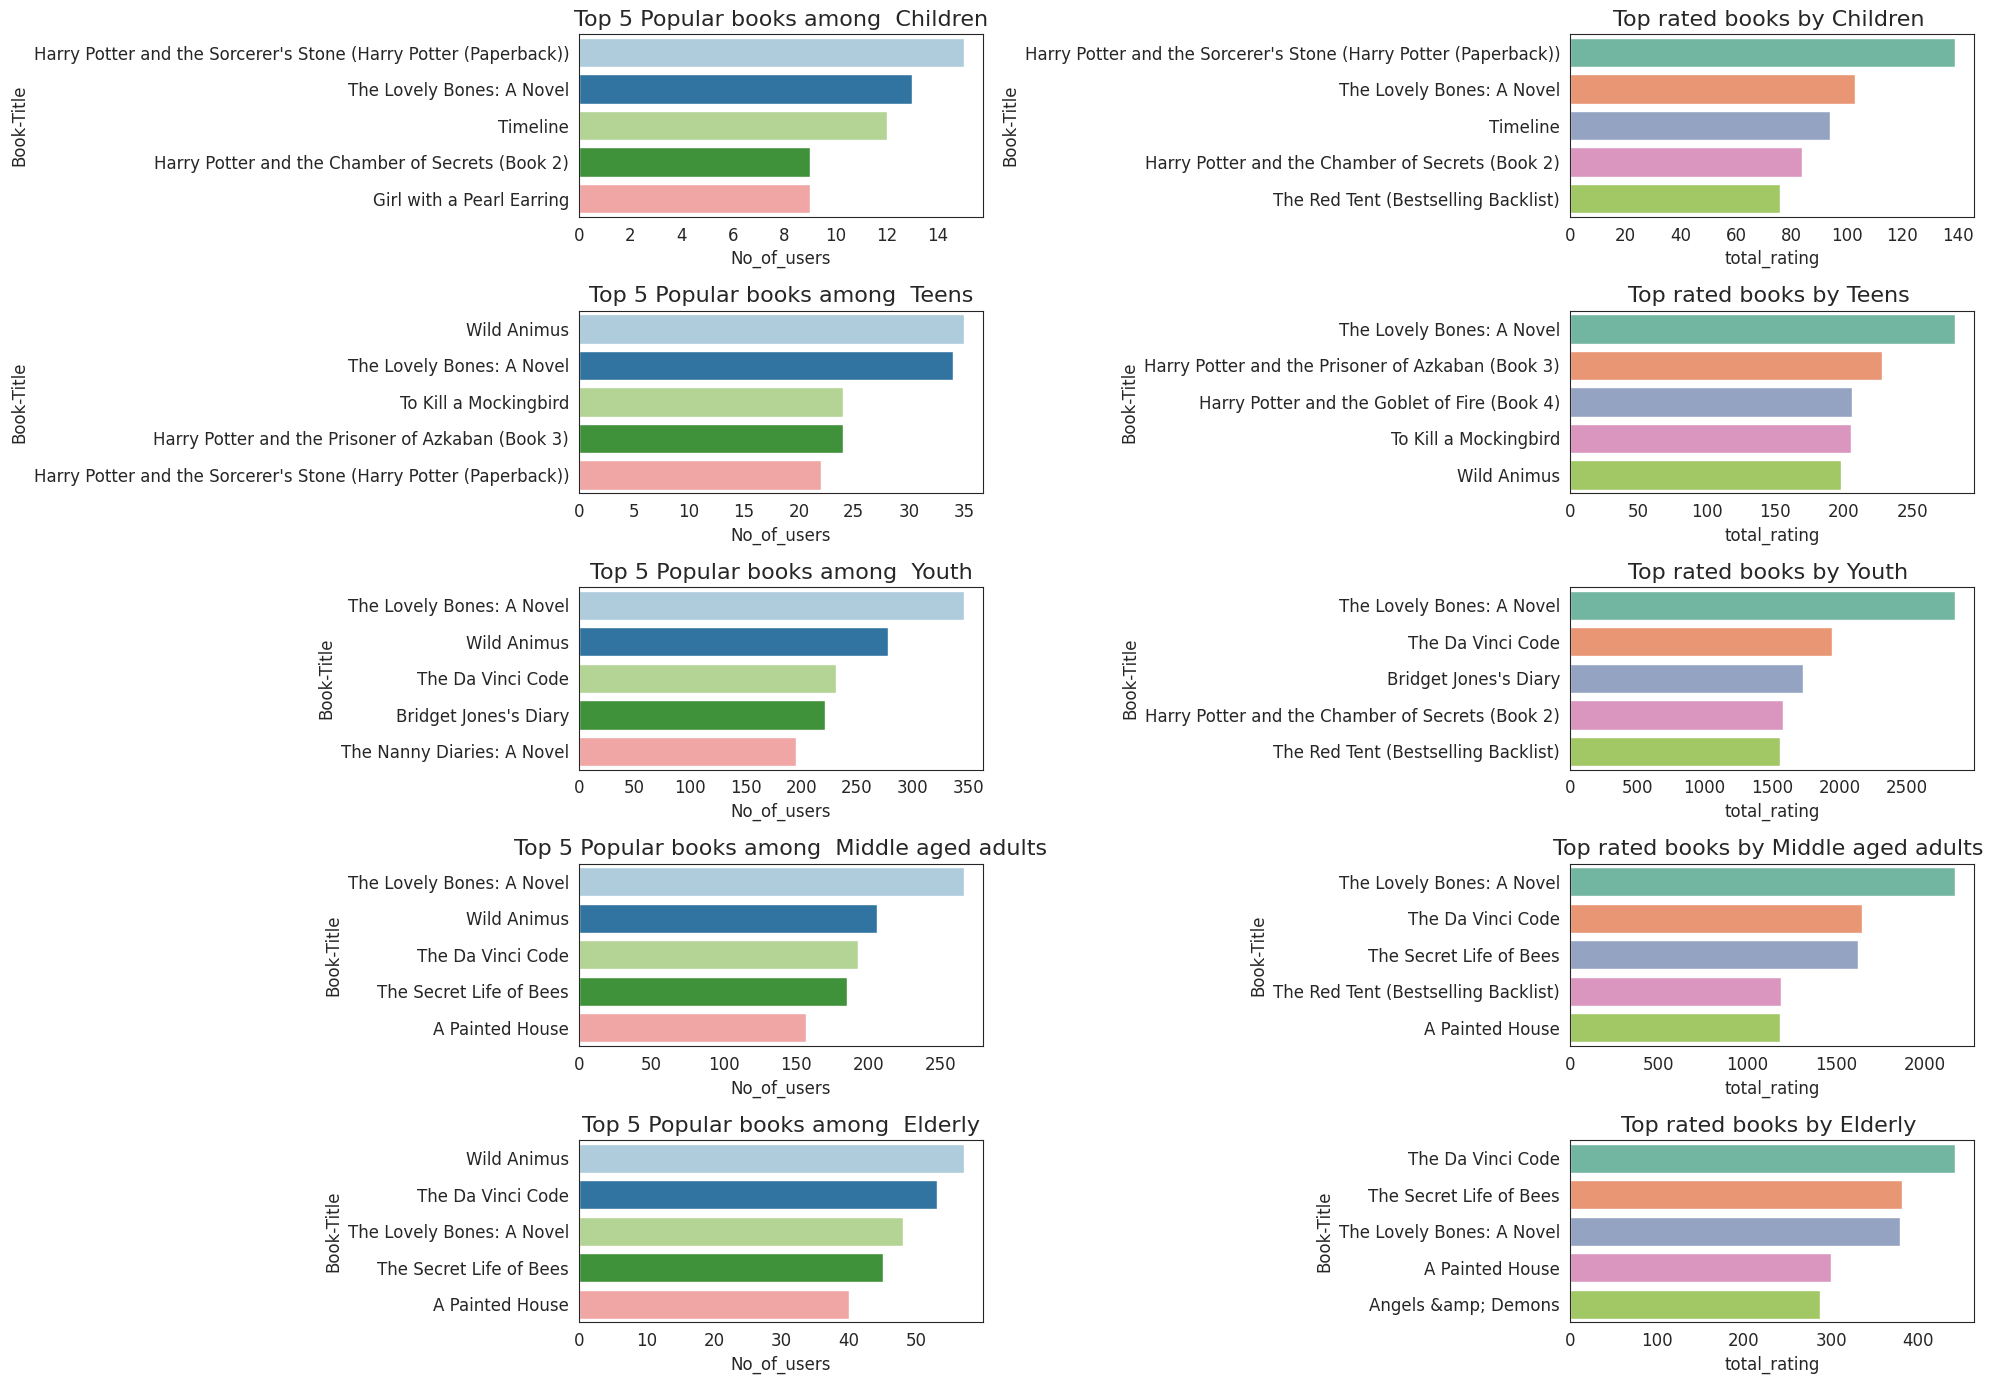

In [ ]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index()
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1

plt.tight_layout()

In [ ]:
#The Lovely Bones: A Novel and Wild Animus are the two most read books.
#Most popular book author based on the number of ratings is Stephan King .
#Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
#The majority of readers are between the ages of 20 and 40.
#The majority of readers who have given the books ratings are from the United States and Canada.
#Regardless of the age group, The Lovely Bones and Wild animus appear on lists of the top-rated books.

In [ ]:
required_ratings = 3
user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]
print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 313417


In [ ]:
required = len(filter_df.ISBN.unique()) * 0.1
user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]
print('Number of top 10% users are: {}'.format(filter_df.shape[0]))


Number of top 10% users are: 167394


In [ ]:
filter_df.shape

(167394, 10)

In [ ]:
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Hack: //Legend of the Twilight, Vol. 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
sparse = csr_matrix(table)
sparse

<13403x14947 sparse matrix of type '<class 'numpy.float64'>'
	with 166539 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
def get_recommendations(name, n):
  # getting book id
  book_id= np.where(table.index==name)[0][0]
  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()
  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return


In [ ]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
J. K. Rowling: The Wizard Behind Harry Potter
A Dash of Death
So Much to Tell You
Dragonquest Achille Cover


In [ ]:
model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_cosine_recommendations(name, n):
  print('Cosine Similarity based recommendations.\n')
  # distances and indices based on similarity
  distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)
  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return

In [ ]:
get_cosine_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Hobbit: or There and Back Again
The Two Towers (The Lord of the Rings, Part 2)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation


In [ ]:
#SVD

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [ ]:
print('The number of books that are explicitely rated are',explicit_rating['ISBN'].nunique())
ratings_count_df=explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())
print('Number of  books rated by atleast 5 users:',len(selected_books))
filter_df=explicit_rating.loc[explicit_rating['ISBN'].isin(selected_books)]

The number of books that are explicitely rated are 149655
Number of  books rated by atleast 5 users: 10731


In [ ]:
print('The number of users who have explicitely rated books are',explicit_rating['User-ID'].nunique())

#keeps Users who have rated more than five books
books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 68080
Number of  users who have rated atleast 5 books are : 5911
The shape of data fame with filtered number of interactions :  (114147, 3)


In [ ]:
complete_df = filter_df.copy()

In [ ]:
complete_df['Book-Rating'].describe()

count    114147.000000
mean          7.816728
std           1.774365
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [ ]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
complete_df['Book-Rating']= complete_df['Book-Rating'].apply(smooth_user_preference)
complete_df.head()

,User-ID,ISBN,Book-Rating
177,276847,3404148576,3.169925
179,276847,3423071516,3.459432
186,276847,3442413508,3.459432
189,276847,3442437717,3.000000
190,276847,3442441080,3.459432


In [ ]:
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['User-ID'],
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 91317
# interactions on Test set: 22830


In [ ]:
test_df.head()

,User-ID,ISBN,Book-Rating
595435,143415,0804117683,2.584963
1129708,271195,0061091502,3.169925
921324,224430,0446675059,3.321928
963425,232492,0553580191,3.459432
415865,98783,0553290797,3.169925


In [ ]:
users_books_pivot_matrix_df = train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,881787017X,8838910170,8845205118,8845247414,8845915611,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [ ]:
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
sigma = np.diag(sigma)

In [ ]:

predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt)
predicted_ratings_matrix

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [ ]:
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()


,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,-0.004043,0.002397,0.002762,-0.003667,-0.000216,-0.000260,0.002452,-0.000518,0.004893,0.013587,...,0.000900,0.000915,-0.000973,0.001754,0.001617,0.002436,0.000213,-0.003772,-0.001000,0.003247
0002251760,0.005552,0.007314,0.002470,0.021147,0.000592,0.000613,0.002472,0.004229,0.003706,0.015128,...,-0.000332,0.000689,-0.001395,0.004843,-0.004528,-0.000479,0.000768,0.004350,-0.005558,0.002105
0002259834,0.000355,0.001067,0.000394,0.002019,0.000052,0.000053,0.000451,-0.000140,0.000439,0.000354,...,0.000172,0.000070,-0.000247,0.000445,-0.000263,0.000017,0.000091,0.000791,-0.000169,-0.000182
0002558122,-0.003808,-0.003172,0.001659,-0.004843,-0.000196,-0.000568,0.001098,-0.000394,0.002326,0.013740,...,-0.000164,0.000997,0.001802,0.001870,0.001901,0.003525,0.000112,-0.004649,-0.001760,0.003177
0006480764,-0.000063,0.002744,0.000518,0.000504,-0.000052,0.000107,0.000705,-0.000046,0.000544,0.008970,...,0.000426,0.000068,-0.001599,-0.000073,0.000081,-0.000446,0.000147,0.000411,0.009194,-0.000599


In [ ]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df

    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'ISBN',
                                                          right_on = 'ISBN')[['ISBN','Book-Title','Book-Author']]

        return recommendations_df

#Creating object of the class
cf_recommender_model = CFRecommender(predicted_ratings_df, books)

In [ ]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
full_indexed_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

In [ ]:
print(f'These are  books that the user ID {user_ids[3]} has already rated \n')
books.loc[books['ISBN'].isin(list(get_items_interacted(user_ids[3],train_indexed_df)))]['Book-Title']

These are  books that the user ID 254 has already rated 



274                            The Golden Compass (His Dark Materials, Book 1)
282                                                        Making Minty Malone
285                                                                Animal Farm
356                                                    The Secret Life of Bees
485                                      She's Come Undone (Oprah's Book Club)
1175                                                             American Gods
2785                                       The Hobbit: or There and Back Again
2809                            Harry Potter and the Sorcerer's Stone (Book 1)
2969                                                 The Bonesetter's Daughter
3459                          Harry Potter and the Chamber of Secrets (Book 2)
3839                         Harry Potter and the Prisoner of Azkaban (Book 3)
4241                                                    American Gods: A Novel
5431                              Harry Potter and t

In [ ]:
print(f'Recommending books for User ID: {user_ids[3]} ')
cf_recommender_model.recommend_items(user_ids[3],items_to_ignore= get_items_interacted(user_ids[3],train_indexed_df),verbose=True)

Recommending books for User ID: 254 


,ISBN,Book-Title,Book-Author
0,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. ROWLING
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. ROWLING
2,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. ROWLING
3,0446310786,To Kill a Mockingbird,HARPER LEE
4,0385504209,The Da Vinci Code,DAN BROWN
5,0345339681,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN
6,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",MITCH ALBOM
7,0316769487,The Catcher in the Rye,J.D. SALINGER
8,0345339703,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN
9,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN


In [ ]:
data=df[:10000]

In [ ]:
isbn_to_title = dict(zip(data['ISBN'], data['Book-Title']))

In [ ]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,76.0,Elderly,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,76.0,Elderly,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,8,5,76.0,Elderly,CANADA
3,1552041778,Jane Doe,R. J. KAISER,1999.0,Mira Books,8,5,76.0,Elderly,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.0,Brilliance Audio - Trade,8,6,76.0,Elderly,CANADA


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Book-Title'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
isbn_to_index = {isbn: idx for idx, isbn in enumerate(data['ISBN'])}

In [ ]:
def get_recommendations(user_id):
    user_ratings = data[data['User-ID'] == user_id]
    user_books = user_ratings['ISBN'].tolist()

    recommendations = []

    for book in user_books:
        book_index = isbn_to_index[book]
        sim_scores = list(enumerate(cosine_sim[book_index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top 10 similar books (excluding the book itself and duplicates)
        top_similar_books = [data['ISBN'][i[0]] for i in sim_scores if data['ISBN'][i[0]] != book and data['ISBN'][i[0]] not in user_books][:10]

        recommendations.extend(top_similar_books)

    return recommendations


In [ ]:
user_id = 8  # Replace with a valid user ID from your dataset
recommended_books = get_recommendations(user_id)
recommended_books=recommended_books[:10]
print('ISBN','      Book-Title')
for i in recommended_books:
  print(i,isbn_to_title[i])

ISBN       Book-Title
0060506067 Clara Callan : A Novel
0312135084 Henry and Clara
0399135782 The Kitchen God's Wife
0671870432 PLEADING GUILTY
0440234743 The Testament
0452264464 Beloved (Plume Contemporary Fiction)
0609804618 Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source
1841721522 New Vegetarian: Bold and Beautiful Recipes for Every Occasion
0971880107 Wild Animus
0345417623 Timeline
